In [1]:
import os
os.environ["SPS_HOME"] = "/Users/fpetri/packages/fsps" 

In [2]:
import numpy as np

import lbg_forecast.sps as sps
import lbg_forecast.popmodel as pop
import lbg_forecast.sfh as sfh
import lbg_forecast.igm as igm
import lbg_forecast.distributions as dstr
import lbg_forecast.hyperparams as hyp
import lbg_forecast.tools as tools

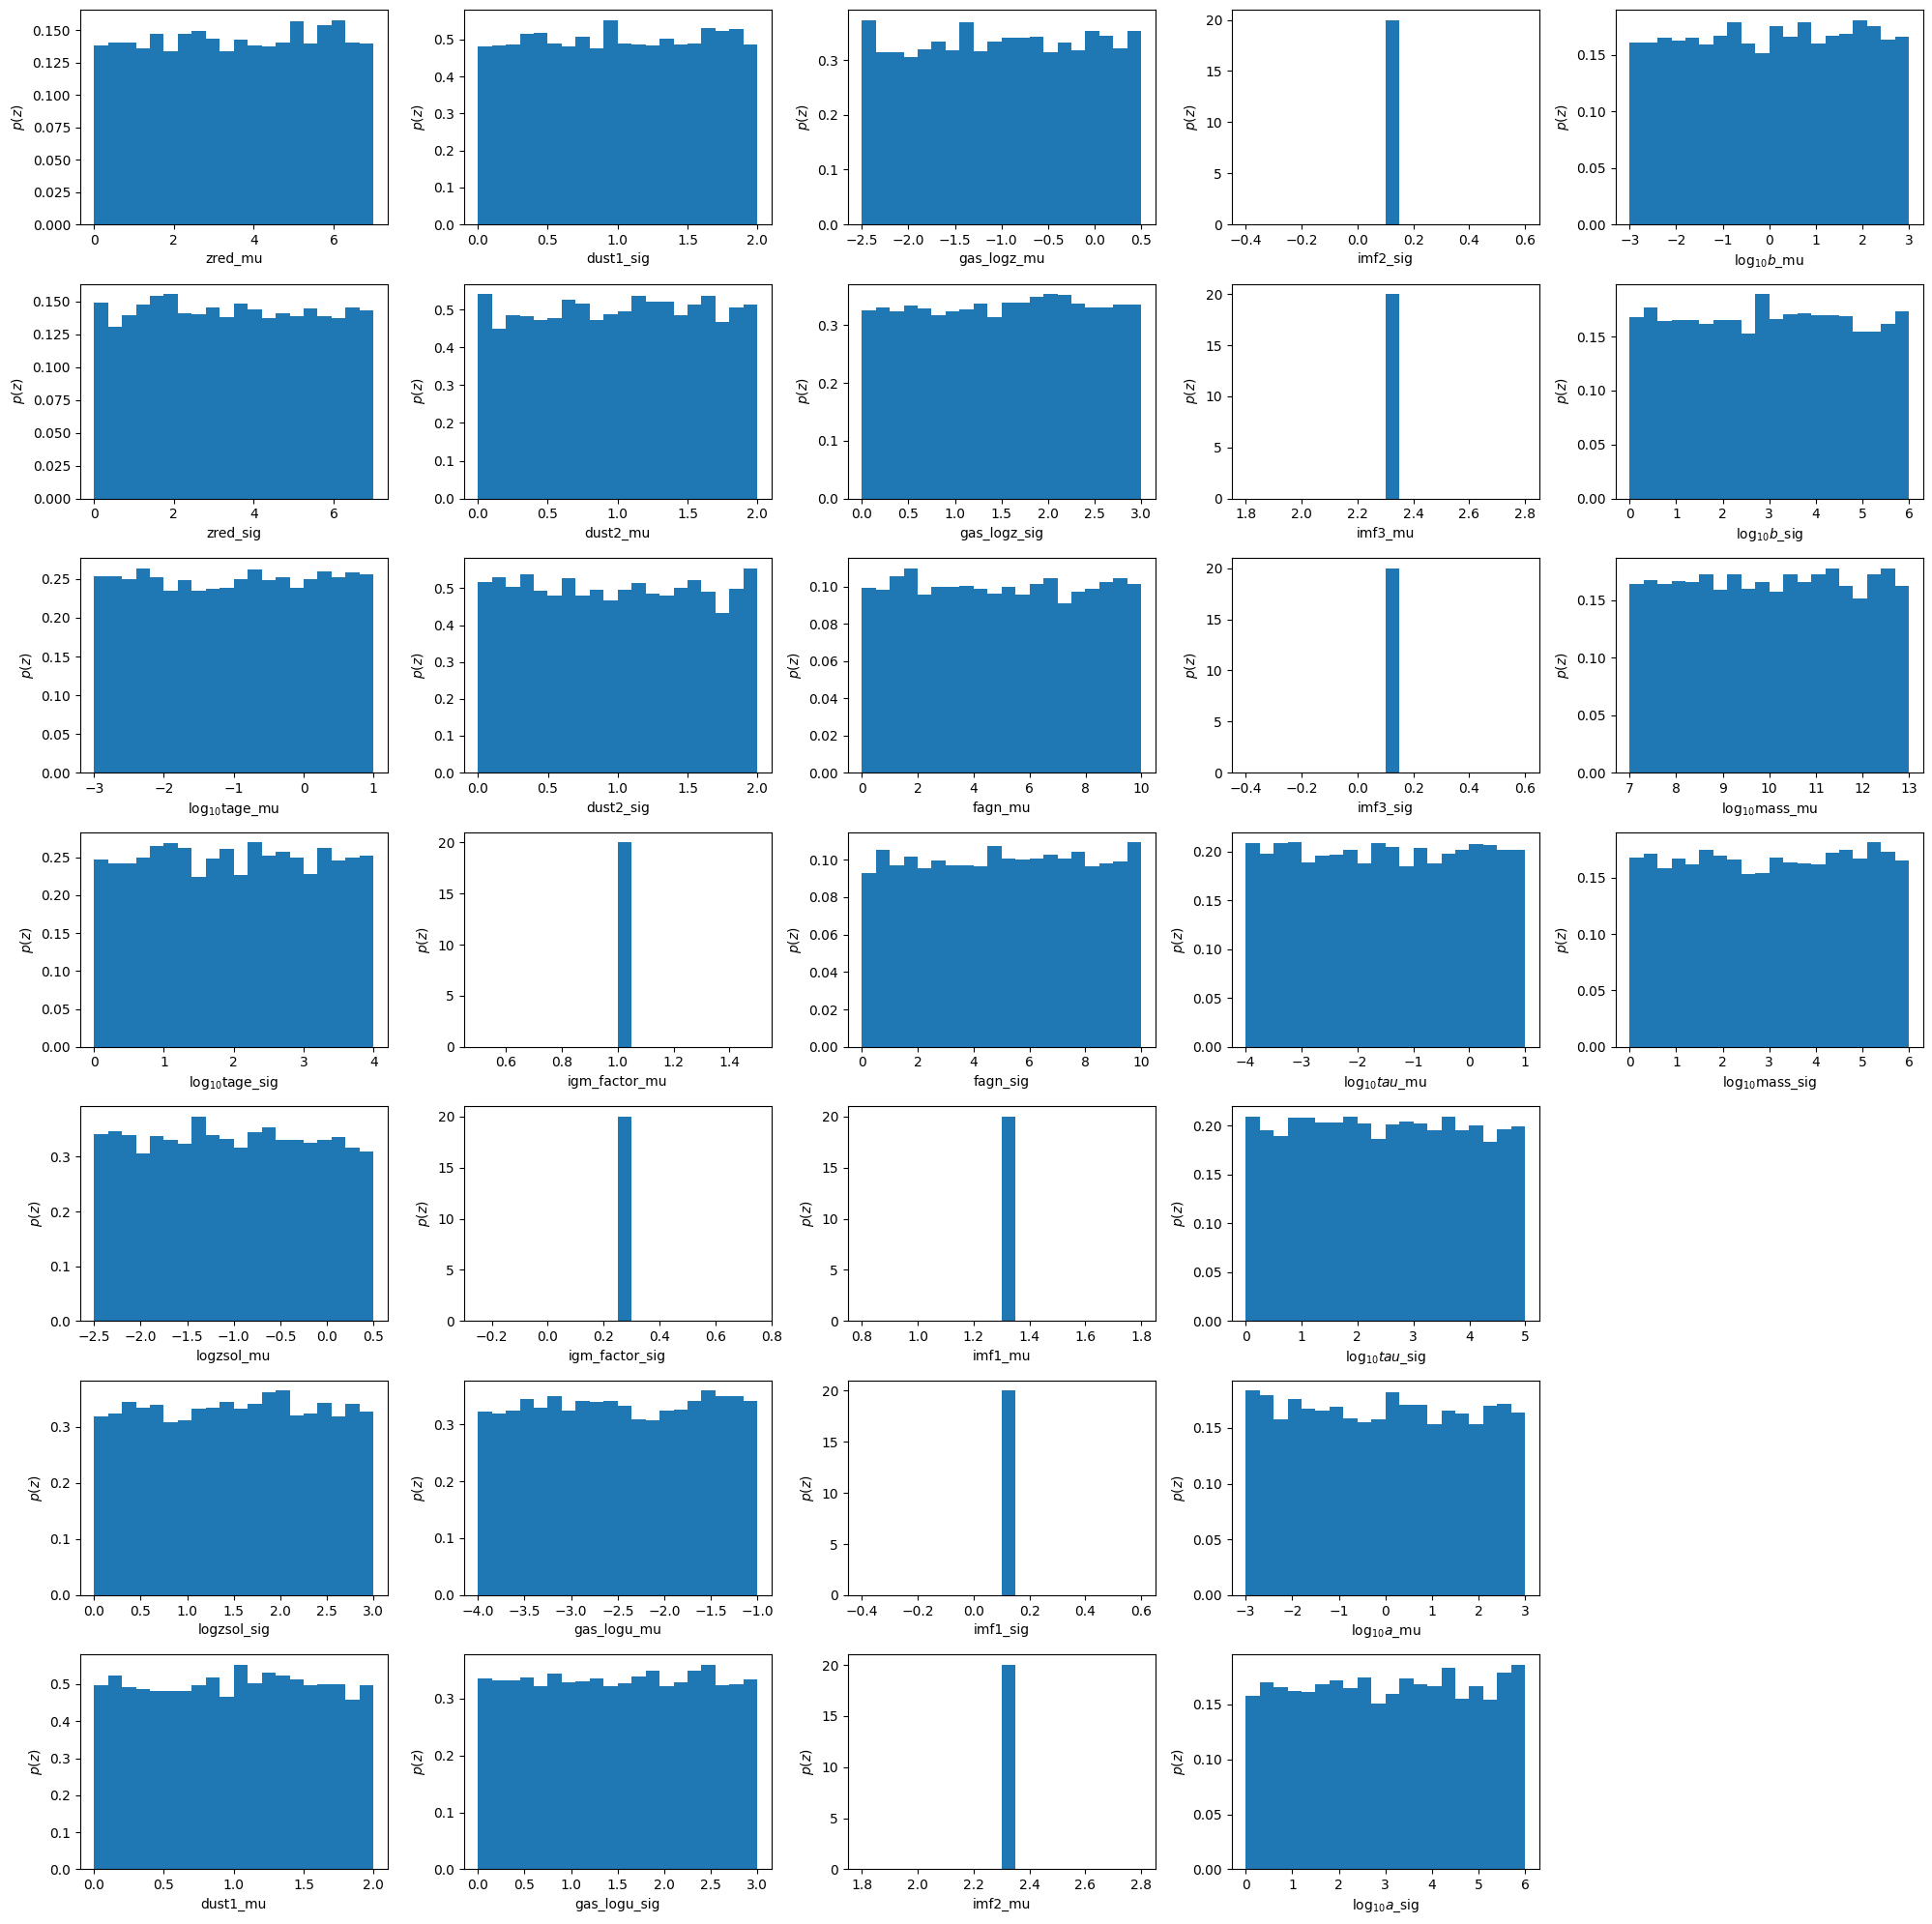

In [3]:
hyp.plot_hyperparameters(10000, hyp.define_hyperparameter_bounds(), rows=7, nbins=20)

In [4]:
data = tools.simulate_sample_photometry_dpl(1)
print(data)

[array([[44.09196129, 37.04589734, 31.53816608, 29.65364115, 29.15846196,
        29.05796138]]), array([[ 4.92049866,  0.94626572, -0.33361875,  1.90638332,  0.38777215,
         0.92892926, -1.64134388, -2.30307563,  3.94525129,  1.32847823,
         2.41726528,  2.34018926, -0.97059188, -2.37636075, -2.17705039,
        10.18466906]]), array([[ 1.10863231,  6.49844541],
       [-0.42312523,  1.49522869],
       [-0.54599447,  0.17717918],
       [ 0.50691481,  1.86588433],
       [ 0.40262016,  0.04516747],
       [ 1.        ,  0.25      ],
       [-1.4875431 ,  0.4397027 ],
       [-2.05630471,  0.3781868 ],
       [ 4.20152789,  0.43787854],
       [ 1.3       ,  0.1       ],
       [ 2.3       ,  0.1       ],
       [ 2.3       ,  0.1       ],
       [-2.78448247,  3.57584091],
       [ 2.17170001,  4.03063343],
       [-0.64217048,  2.12588093],
       [ 7.99084861,  1.31194425]])]


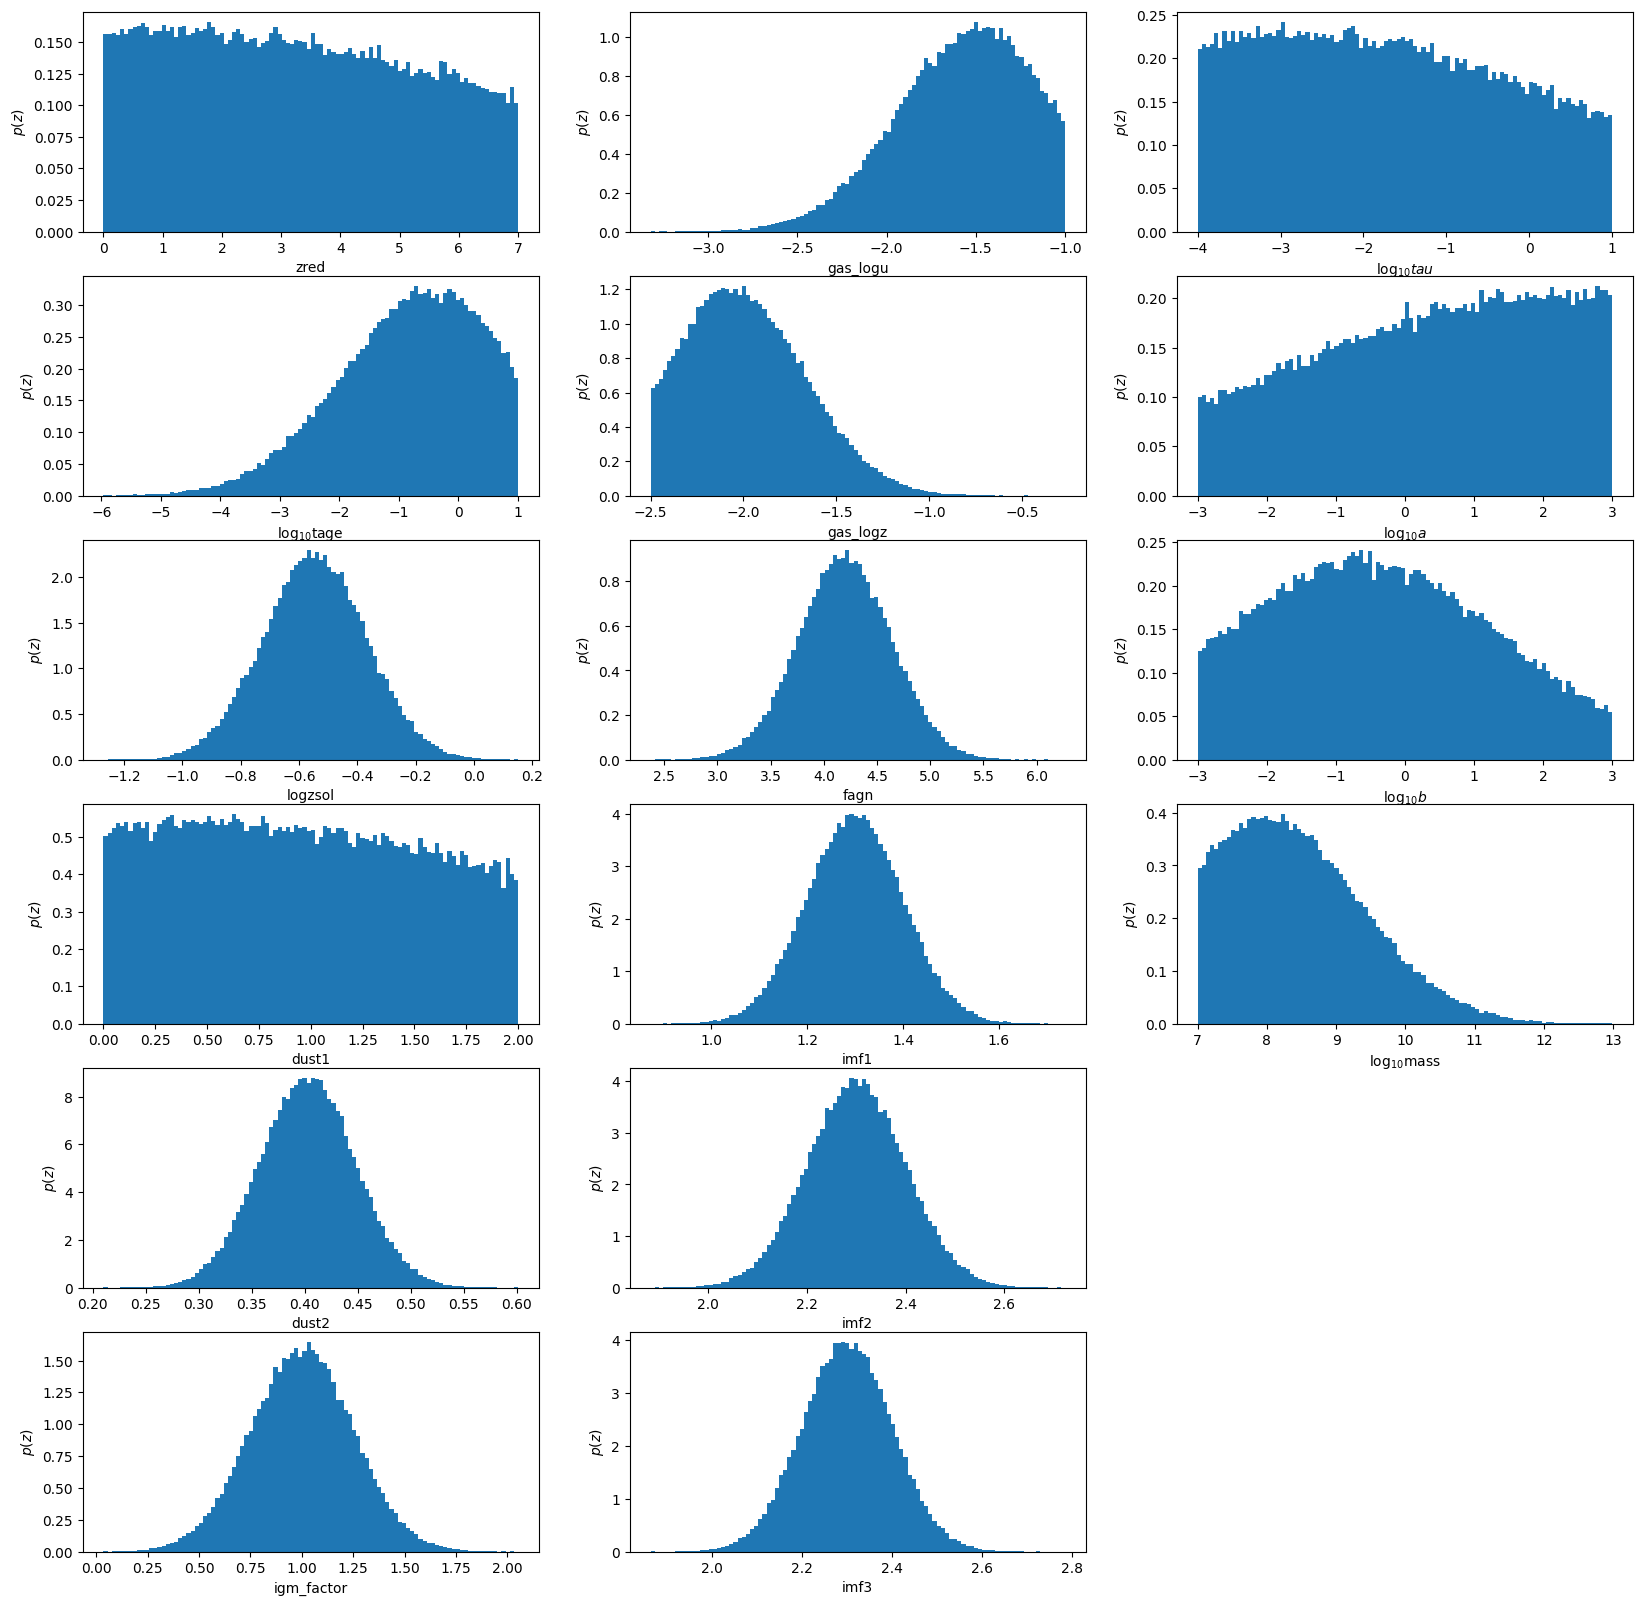

In [5]:
pop.plot_galaxy_population(100000, hparams=data[2], rows=6, nbins=100)